# IPython.display and Jupyter widgets

User interaction with terminal-based Python interpreters—launched by the `python` and `ipython` commands—is limited to plain-text input and output. Interactive plotting requires launching a separate GUI window to show plot output.

Jupyter notebooks run in a web browser (or JupyterLab, which has a browser-like interface), providing the potential for richer input and output interaction.  IPython and the Jupyter project provide modules to support such interaction:  `IPython.display` provides tools for displaying a wide variety of media types under Python control, and `ipywidgets` provides tools enabling GUI interaction with Python code using familiar GUI widgets like sliders, checkboxes, and dropdown menus.

In [1]:
# Some familiar imports:
import numpy as np
from numpy import *
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
# Key tools from IPython.display and ipywidgets:
from IPython.display import clear_output, display, HTML
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [3]:
plt.ion()

## IPython.display

`IPython.display` ([`IPython.display` documentation](http://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)) is a module containing a variety of classes and functions supporting display of many types of rich media in a Jupyter notebook, including HTML, JavaScript, Markdown, images, and videos (including special support for Vimeo and YouTube videos). You can use Python code to generate some of the media content, and then use a `display` object to render it in a notebook cell.

The following function takes any number of keyword arguments, uses them to create a string containing HTML defining a tabular view of the keywords and their values, and then displays the HTML in the notebook using the `HTML` class and the `display` function.

In [4]:
def show_args(**kwargs):
    s = '<h3>Arguments:</h3>\n<table>\n'
    for k, v in list(kwargs.items()):
        s += '<tr><td>{0}</td><td>{1}</td></tr>\n'.format(k,v)
    s += '</table>'
    display(HTML(s))

In [5]:
show_args(a=10, b='Hi There', c=True)

a,10
b,Hi There
c,True


## ipywidgets

`ipywidgets` is a module containing a variety of classes and functions supporting GUI interaction with Python objects in a Jupyter notebook. This notebook provides a bare-bones overview.  For more on `ipywidgets`, see:

* The [ipywidgets — Jupyter widgets documentation](https://ipywidgets.readthedocs.io/en/latest/index.html), especially the [Simple widget introduction](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html) and [Using `interact` and `interactive`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
* The [ipywidgets GitHub repo](https://github.com/jupyter-widgets/ipywidgets/blob/master/README.md), especially the [index of tutorial and example notebooks](https://github.com/jupyter-widgets/ipywidgets/blob/e1af98674e46c93c1fffe1e42a20adb2a62dad1e/docs/source/examples/Index.ipynb).
* [Project Jupyter | Widgets](http://jupyter.org/widgets) — A collection (currently rather modest) of curated contributed advanced widgets, e.g., for displaying and interacting with maps and tables


### Activating widget support

**Important:** Widgets are a Jupyter *extension*; the extension must be activated before use. The necessary packages are included with `anaconda`. The documentation indicates that installation with `conda` automatically activates the widgets extension, but sometimes this may not happen when installing `anaconda` in a conda environment.  To list your current active extensions, run this (in your `bda20` env):

    $ jupyter nbextension list

Look for a line indicating the widgets extension is enabled; it should look similar to this:

    jupyter-js-widgets/extension  enabled

If widgets are *not* enabled for you, run this *in the env hosting the Jupyter server you will use*:

    $ jupyter nbextension enable --py --sys-prefix widgetsnbextension

This is a persistant setting; it needn't be reactivated each time the conda env is activated.

Note that the `--sys-prefix` option is probably important for users who use conda extensions (even if some docs omit it). See [Issue #541 · jupyter-widgets/ipywidgets](https://github.com/jupyter-widgets/ipywidgets/issues/541) for discussion of this (as of late 2017).

JupyterLab has its own widget extension that may need to be installed separately if you want to use widgets in JupyterLab. If you're a JupyterLab user, for the latest info, see: [Installation — Jupyter Widgets documentation](https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-the-jupyterlab-extension). 

### Basic widgets

Here's a simple widget—a slider providing an interface to a Python integer value:

In [6]:
widgets.IntSlider()

IntSlider(value=0)

Here we relied on the fact that widgets provide a `__repr__` method (the method Python calls when you just enter an instance at a prompt) that displays the widget's GUI interface.  More generally, you display a widget using `display`:

In [7]:
islider = widgets.IntSlider()

In [8]:
display(islider)

IntSlider(value=0)

A displayed widget comprises a "view" of the underlying widget "model." The model tracks the state of the widget object; here, the state is just the value of the integer represented by the slider. The same model can have multiple views (in different notebook cells); when this is the case, the views are *synchronized*.

In [9]:
display(islider)

IntSlider(value=0)

Widgets have attributes and methods that let you set and access their state:

In [10]:
dir(islider)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_notifiers',
 '_call_widget_constructed',
 '_comm_changed',
 '_compare',
 '_cross_validation_lock',
 '_default_keys',
 '_display_callbacks',
 '_dom_classes',
 '_gen_repr_from_keys',
 '_get_embed_state',
 '_handle_custom_msg',
 '_handle_displayed',
 '_handle_msg',
 '_holding_sync',
 '_ipython_display_',
 '_is_numpy',
 '_lock_property',
 '_log_default',
 '_model_id',
 '_model_module',
 '_model_module_version',
 '_model_name',
 '_msg_callbacks',
 '_notify_trait',
 '_property_lock',
 '_register_validator',
 '_remove_notifiers',
 '_repr_keys',
 '_send',
 '_should_send_property

In [11]:
# Access the current state:
print(islider.value)

0


In [12]:
# Set the state:
islider.value = 30

### The interact and interactive functions

The simplest way to interact with widgets is via the `interact` and `interactive` functions. These functions exploit Python's *keyword argument* support. You provide these functions a function that accepts keyword arguments. You additionally provide those keyword arguments, assigning them to widgets that provide and display the values of the keyword arguments. To simplify things, the `interact` and `interactive` functions recognize *widget abbreviations*.

Widget abbreviations can be as simple as a Python int or a float; `interact(ive)` will take that to mean you want it to use a slider widget of the appropriate type with a default range. Alternatively, you can provide a tuple with a range and optional step size, or a full widget object.  Other types (boolean, strings, lists) can serve as handy abbreviations of appropriate widgets.

Here's an example, using the `show_args` HTML table display function from above.

In [13]:
i = interact(show_args,
         Temp=(0,10),
         Current=(0.,10.,0.01),
         z=True,
         Text='Type here!',
         a=widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, value=5.0, description="Float (a)")
         )

# Note:  If `show_args` had a return value, `interact` would display it
# using an appropriate widget.

interactive(children=(IntSlider(value=5, description='Temp', max=10), FloatSlider(value=5.0, description='Curr…

### Interactive plotting

To build interactive plots, you can simply define a function drawing a plot that takes keyword args providing the values of the interactive elements.  Here's an example drawing a normal distribution PDF whose mean and standard deviation are controlled by sliders.  Here we use the `interactive` function rather than `interact`; `interactive` returns a widget collection object rather than immediately displaying the widgets. This is handy if you want to access results of the interaction later in the notebook. 

In [14]:
def plot_normal(mu=0., sigma=1.):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    xvals = linspace(-5, 5, 100)
    ax.set_xlim(xvals[0], xvals[-1])
    ax.set_ylim(0, 1.)

    distn = norm(mu, sigma)
    yvals = distn.pdf(xvals)
    ax.plot(xvals, yvals, 'b-', lw=2)
    
    ax.annotate(r'$\mu={:.1f}$'.format(mu), xy=(.75, .9),  xycoords='axes fraction', fontsize=15)
    ax.annotate(r'$\sigma={:.1f}$'.format(sigma), xy=(.75, .82),  xycoords='axes fraction', fontsize=15)
    
    return sigma*sqrt(2*pi)  # return value will get stored in .result 

2.5066282746310002

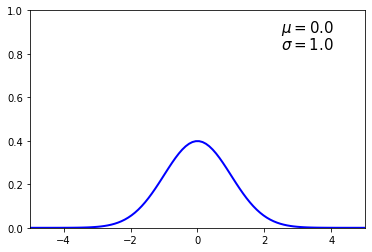

In [15]:
plot_normal()

In [16]:
# Put the plot drawing function in a widget collection:
widget = interactive(plot_normal, mu=(-3., 3.), sigma=(.5, 3.))

In [17]:
# You have to explicitly display the widget collection.
display(widget)

interactive(children=(FloatSlider(value=0.0, description='mu', max=3.0, min=-3.0), FloatSlider(value=1.0, desc…

In [18]:
widget.kwargs

{'mu': 0.0, 'sigma': 1.0}

In [19]:
print('mu = {}, sigma = {}'.format(widget.kwargs['mu'], widget.kwargs['sigma']))

mu = 0.0, sigma = 1.0


In [20]:
widget.result

2.5066282746310002